In [1]:
# Library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [2]:
# Load Data
oecd_bli = pd.read_csv('Data/oecd.csv', thousands=",")
gdp_per_capita = pd.read_csv('Data/gdp_per_capita.csv', thousands=",", delimiter='\t', encoding='latin1', na_values="n/a")

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") 
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
"""

    Args:
    -------
    pd.DataFrame.pivot : Return reshaped DataFrame organized by given index / column values.
    pd.DataFrame.rename : Change column name.
    pd.DataFrame.set_index : Set the DataFrame index using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.
    pd.merge: Merge dataframe or named Series object with a database-style join.


"""

'\n\n    Args:\n    -------\n    pd.DataFrame.pivot : Return reshaped DataFrame organized by given index / column values.\n    pd.DataFrame.rename : Change column name.\n    pd.DataFrame.set_index : Set the DataFrame index using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.\n    pd.merge: Merge dataframe or named Series object with a database-style join.\n\n\n'

In [5]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

In [6]:
y

array([[6.4],
       [6.5],
       [5.8],
       [5.5],
       [6.1],
       [5.9],
       [5.9],
       [6.2],
       [6.7],
       [5.7],
       [5.4],
       [5.4],
       [5.9],
       [6.3],
       [5.9],
       [6. ],
       [5.9],
       [7.2],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.6],
       [7.4],
       [7.4],
       [7.1],
       [6.8],
       [7.3],
       [7.5]])

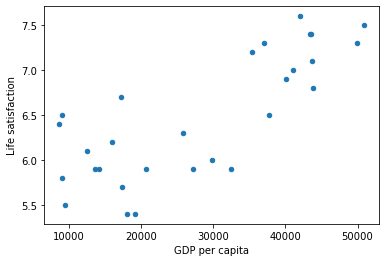

In [7]:
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.show()

In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train Model
model.fit(x, y)

#Make a prediction for a Cyprus
X_new = [[22587]] #Cyprus GDP per capita
print(model.predict(X_new))

[[6.25984414]]


In [9]:
oecd_bli[oecd_bli["INEQUALITY"]=="TOT"].head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [10]:
gdp_per_capita.head()

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [12]:
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()

In [13]:
import sklearn.neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)